In [49]:
import TurbPy as tb
from TurbPy.imports import *

In [50]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
deck = 'turb_vth0.01/'

dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

sp = 'ion'

In [51]:
timestep = 45000
species = 'electron'

ds =tb.load_vars(dirs,timestep,species)
vpic_info = tb.get_vpic_info(dirs)
dx = vpic_info['dx/de']
dy = vpic_info['dy/de']
mi_me = vpic_info['mi/me']

pxx = np.array(ds['txx'] - (ds['jx']/ds['rho'])*ds['px'])
pyy = np.array(ds['tyy'] - (ds['jy']/ds['rho'])*ds['py'])
pzz = np.array(ds['tzz'] - (ds['jz']/ds['rho'])*ds['pz'])
pxy = np.array(ds['txy'] - (ds['jx']/ds['rho'])*ds['py'])
# pyx = np.array(txy - (jy/rho)*px)
pxz = np.array(ds['tzx'] - (ds['jx']/ds['rho'])*ds['pz'])
# pzx = np.array(tzx - (jz/rho)*px)
pyz = np.array(ds['tyz'] - (ds['jy']/ds['rho'])*ds['pz'])

In [52]:
ux=ds['jx']/ds['rho']
uy=ds['jy']/ds['rho']
uz=ds['jz']/ds['rho']

In [53]:
dux_dx = tb.pderiv(ux,dx=dx,ax=0,order=2,smth=None)
duy_dx = tb.pderiv(uy,dx=dx,ax=0,order=2,smth=None)
duz_dx = tb.pderiv(uz,dx=dx,ax=0,order=2,smth=None)
dux_dy = tb.pderiv(ux,dx=dx,ax=1,order=2,smth=None)
duy_dy = tb.pderiv(uy,dx=dx,ax=1,order=2,smth=None)
duz_dy = tb.pderiv(uz,dx=dx,ax=1,order=2,smth=None)

In [54]:
theta = np.array(dux_dx + duy_dy)

Dxx = np.array(dux_dx) - (1/3)*theta 

Dyy = np.array(duy_dy) - (1/3)*theta
Dzz = 0 - (1/3)*theta

Dxy = np.array((1/2)*(dux_dy + duy_dx))
Dxz = np.array((1/2)*(duz_dx))
Dyz = np.array((1/2)*(duz_dy))

p = np.array(pxx + pyy + pzz)/3
PIxx = pxx - p
PIyy = pyy - p
PIzz = pzz - p
ptheta = - p * theta
pid = -(PIxx*Dxx+PIyy*Dyy+PIzz*Dzz+ 2.* np.array(pxy*Dxy+pxz*Dxz+pyz*Dyz))

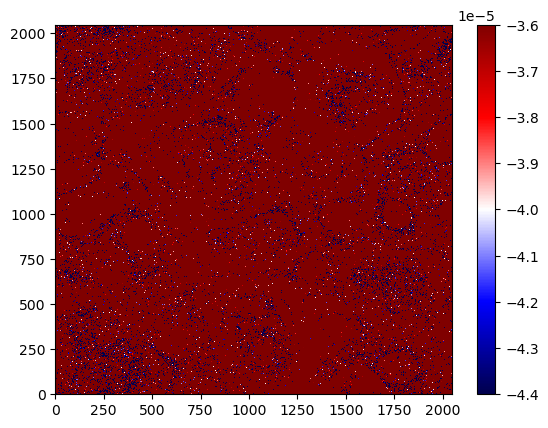

In [57]:
plt.pcolormesh(pid, cmap = 'seismic', vmin = -4 * 10**(-5), vmax = -4 * 10**(-5))
plt.colorbar()

In [56]:
print(np.mean(pid + ptheta))

2.5672932e-07
